In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.models import Model
%matplotlib inline

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/digit-recognizer/train.csv")
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Splitting the data
X = train_data.drop("label", axis = 1)
y = train_data["label"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 42)

In [8]:
X.shape

(42000, 784)

In [9]:
X_train.shape

(33600, 784)

In [10]:
#Reshaping the data to 28x28 matrix and also image flattened into a 784 dimensional vector
X_train.iloc[0,:].values.reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        253, 121,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  63,
        254, 202,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 163,
        255, 144,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 167,
        251,  26,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

6


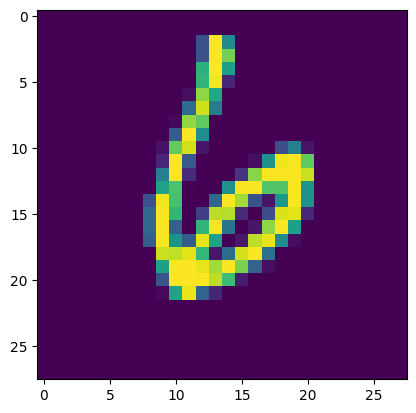

In [11]:
#Visualizing the first y_train value
plt.imshow(X_train.iloc[0,:].values.reshape((28,28)))
print(y_train.iloc[0])

In [12]:
X_train.shape

(33600, 784)

In [13]:
#Unique values
K=len(set(y_train))

In [14]:
K

10

In [15]:
#Dividing every pixel value to 255
X_train,X_test=X_train/255,X_test/255

In [17]:
i = Input(shape=(X_train.shape[1],))
x = Dense(128,activation='relu')(i)
x = Dense(K,activation='softmax')(x)
model = Model(i,x)

In [18]:
#Configuring the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20)

Epoch 1/20
1050/1050 [==============================] - 9s 3ms/step - loss: 0.3215 - accuracy: 0.9088 - val_loss: 0.1988 - val_accuracy: 0.9420
Epoch 2/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1481 - accuracy: 0.9563 - val_loss: 0.1348 - val_accuracy: 0.9613
Epoch 3/20
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1011 - accuracy: 0.9699 - val_loss: 0.1204 - val_accuracy: 0.9635
Epoch 4/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0773 - accuracy: 0.9773 - val_loss: 0.1121 - val_accuracy: 0.9642
Epoch 5/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 0.1087 - val_accuracy: 0.9681
Epoch 6/20
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0984 - val_accuracy: 0.9705
Epoch 7/20
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0350 - accuracy: 0.9898 - val_loss: 0.1083 - val_accuracy:

In [20]:
test_data = pd.read_csv("/content/drive/MyDrive/digit-recognizer/test.csv")
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_id = test_data.index
test_id

RangeIndex(start=0, stop=28000, step=1)

In [24]:
test_prediction = model.predict(test_data).argmax(axis = 1)

875/875 [==============================] - 1s 2ms/step


In [25]:
data_preds = pd.DataFrame()
data_preds["imageId"] = test_id
data_preds["Label"] = test_prediction
data_preds

,imageId,Label
0,0,2
1,1,0
2,2,9
3,3,9
4,4,3
...,...,...
27995,27995,9
27996,27996,7
27997,27997,3
27998,27998,9


In [26]:
data_preds["imageId"] = data_preds["imageId"] + 1
data_preds

,imageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [27]:
data_preds.to_csv("/content/drive/MyDrive/digit-recognizer/test_prediction.csv", index = False)